# Metadata
Raisin Dataset

Abstract: Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.


Data Set Information: Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin. 
2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8.) Class: Kecimen and Besni raisin.

Source: https://archive.ics.uci.edu/dataset/850/raisin


Dataset Head:
     Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float6

/Users/leo/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leo/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leo/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leo/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

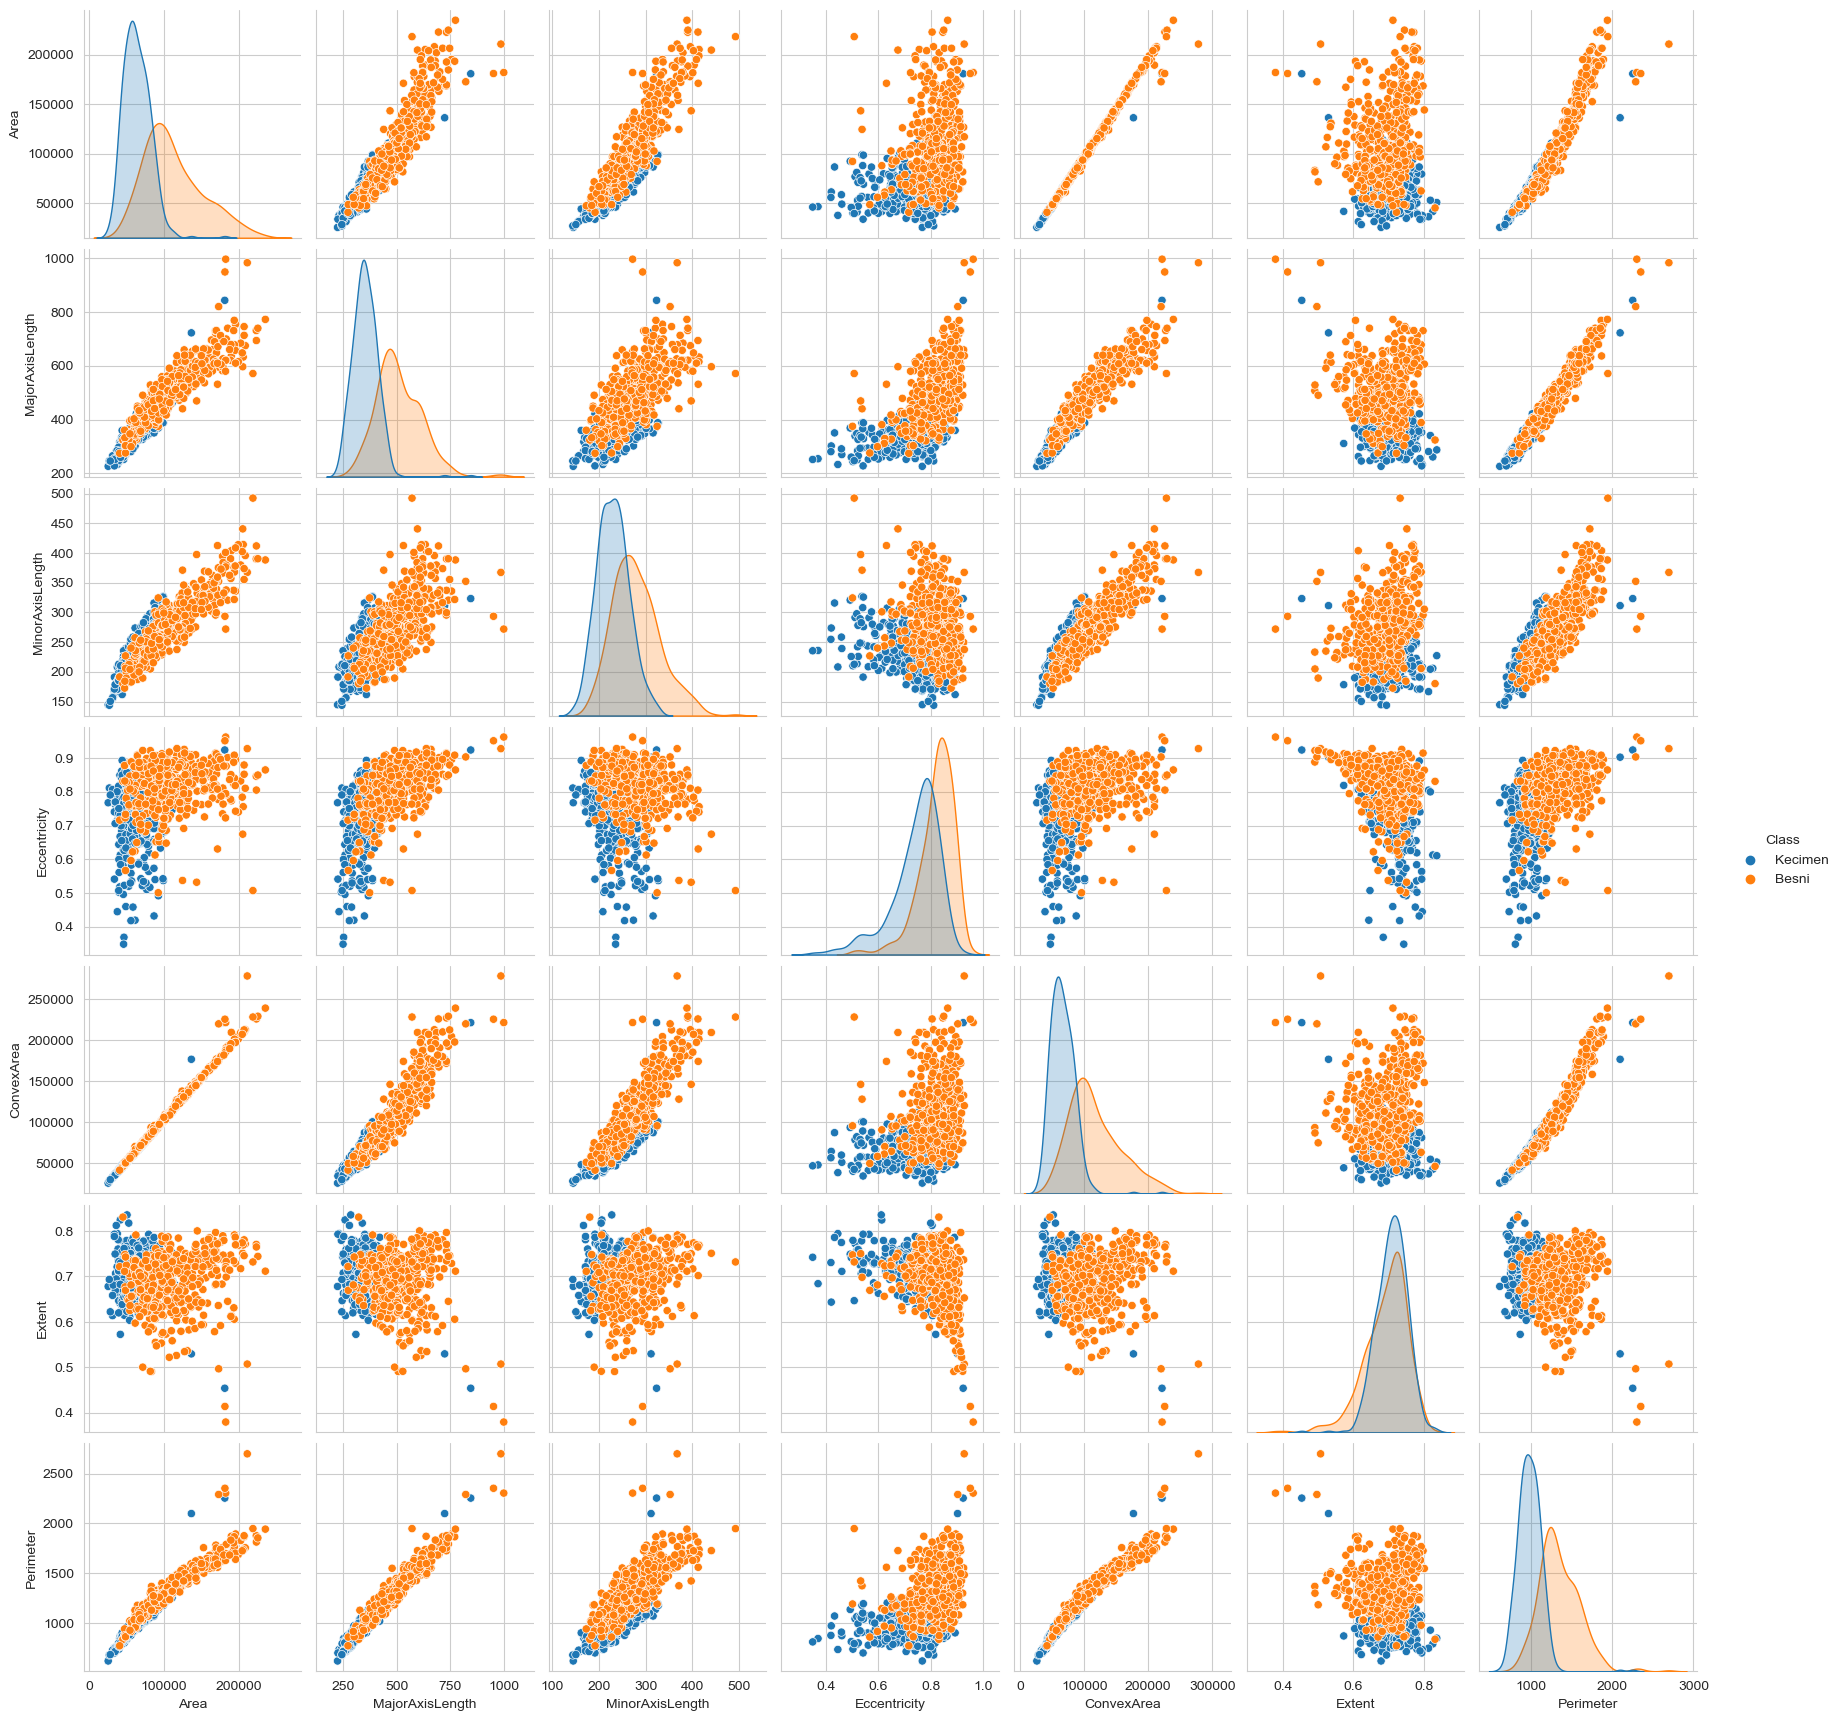

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_excel('/Users/leo/Raisin_Dataset/Raisin_Dataset.xlsx')

# Basic EDA
print("Dataset Head:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nClass Distribution:\n", df['Class'].value_counts())

# Visualizing feature distributions by class
sns.pairplot(df, hue='Class')
plt.show()

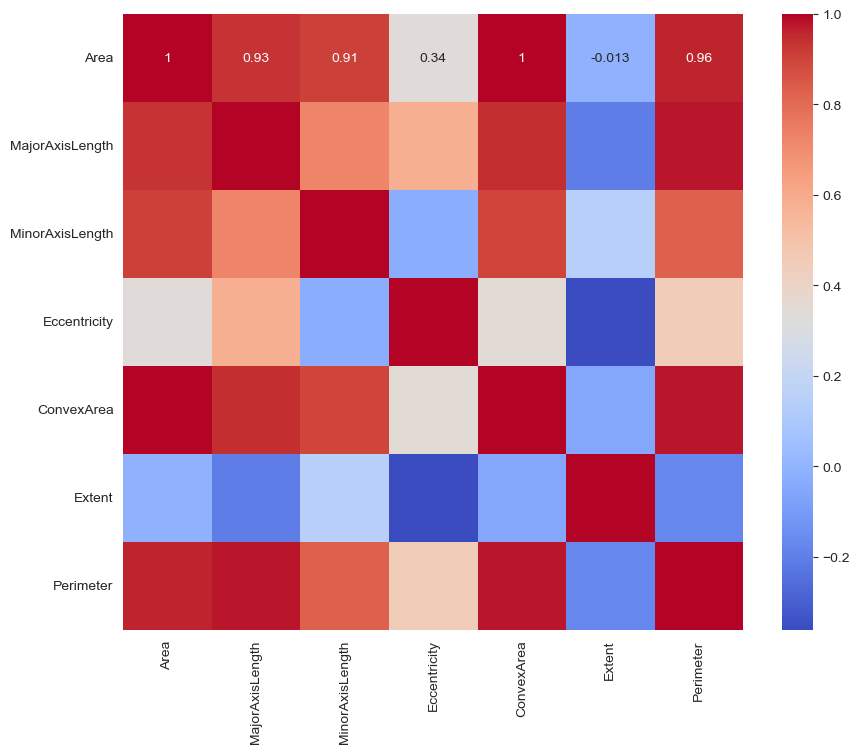

In [2]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Visualizing correlations of numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [3]:
# Importing necessary libraries/modules
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification
from sklearn.svm import SVC  # For Support Vector Machine classification
from sklearn.metrics import classification_report, confusion_matrix  # For model evaluation
import numpy as np  # For numerical operations

# Data Preprocessing
# df is a DataFrame containing the dataset
X = df.drop('Class', axis=1)  # Features (independent variables)
y = df['Class']  # Target variable (dependent variable)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Implementation and Hyperparameter Tuning
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)  # Creating a Random Forest Classifier object
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None]  # Maximum depth of the tree
}
# Grid search for finding the best hyperparameters using cross-validation
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf_model = grid_rf.fit(X_train_scaled, y_train)
# Support Vector Machine (SVM)
svm = SVC(random_state=42, probability=True)  # Creating a Support Vector Machine Classifier object
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Kernel type
}
# Grid search for finding the best hyperparameters using cross-validation
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm_model = grid_svm.fit(X_train_scaled, y_train)

# Model Evaluation

# Function to evaluate the model
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)  # Making predictions on the test set
    print(classification_report(y_test, y_pred))  # Printing classification report
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Printing confusion matrix
    print("Best Parameters:", model.best_params_)  # Printing best hyperparameters found
    print("Best Score:", model.best_score_)  # Printing best accuracy score from cross-validation

# Printing evaluation results for Random Forest Classifier
print("Random Forest Classifier Evaluation:\n")
evaluate_model(grid_rf, X_test_scaled, y_test)

# Printing evaluation results for Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Evaluation:\n")
evaluate_model(grid_svm, X_test_scaled, y_test)


Random Forest Classifier Evaluation:

              precision    recall  f1-score   support

       Besni       0.83      0.84      0.83       129
     Kecimen       0.85      0.84      0.85       141

    accuracy                           0.84       270
   macro avg       0.84      0.84      0.84       270
weighted avg       0.84      0.84      0.84       270

Confusion Matrix:
 [[108  21]
 [ 22 119]]
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.8746031746031747

Support Vector Machine (SVM) Evaluation:

              precision    recall  f1-score   support

       Besni       0.85      0.88      0.86       129
     Kecimen       0.88      0.86      0.87       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270

Confusion Matrix:
 [[113  16]
 [ 20 121]]
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 0.8793650793650795


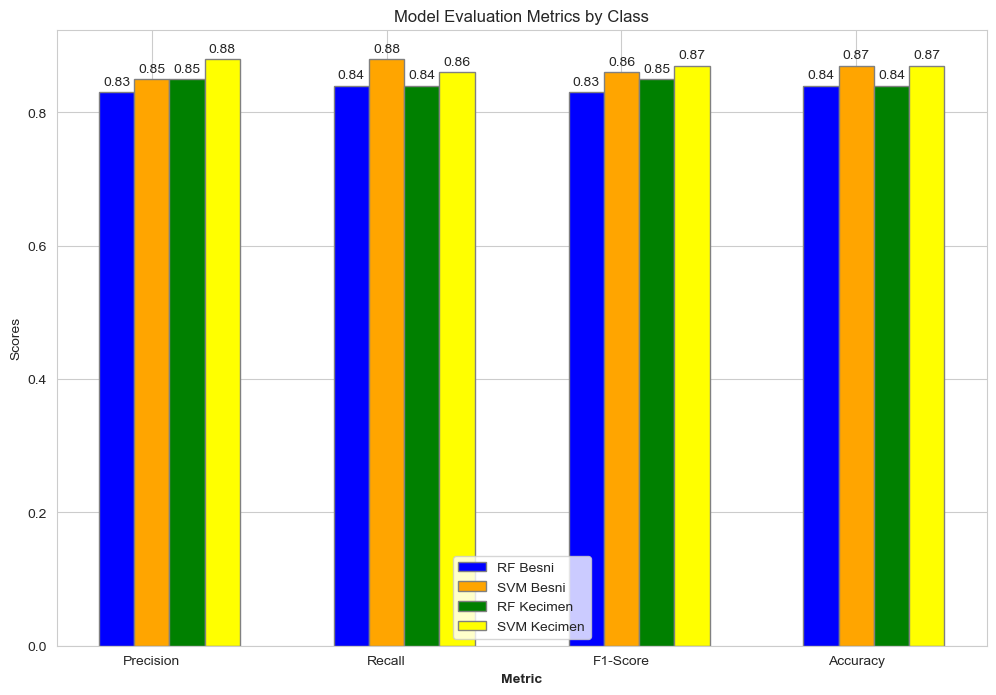

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation data
rf_besni = {'Precision': 0.83, 'Recall': 0.84, 'F1-Score': 0.83, 'Accuracy': 0.84}
svm_besni = {'Precision': 0.85, 'Recall': 0.88, 'F1-Score': 0.86, 'Accuracy': 0.87}
rf_kecimen = {'Precision': 0.85, 'Recall': 0.84, 'F1-Score': 0.85, 'Accuracy': 0.84}
svm_kecimen = {'Precision': 0.88, 'Recall': 0.86, 'F1-Score': 0.87, 'Accuracy': 0.87}

labels = list(rf_besni.keys())
bar_width = 0.15  # Width of the bars

# Set position of bar on X axis
r1 = np.arange(len(labels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(12, 8))

# Add bars for Random Forest Besni
bars1 = ax.bar(r1, rf_besni.values(), color='blue', width=bar_width, edgecolor='grey', label='RF Besni')

# Add bars for SVM Besni
bars2 = ax.bar(r2, svm_besni.values(), color='orange', width=bar_width, edgecolor='grey', label='SVM Besni')

# Add bars for Random Forest Kecimen
bars3 = ax.bar(r3, rf_kecimen.values(), color='green', width=bar_width, edgecolor='grey', label='RF Kecimen')

# Add bars for SVM Kecimen
bars4 = ax.bar(r4, svm_kecimen.values(), color='yellow', width=bar_width, edgecolor='grey', label='SVM Kecimen')

# Function to add value labels on bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to each bar
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Add xticks on the middle of the group bars
ax.set_xlabel('Metric', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(rf_besni))])
ax.set_xticklabels(labels)
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics by Class')

# Create legend & Show graphic
ax.legend()
plt.show()


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best Score for Random Forest: 0.8746031746031747
Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best Score for SVM: 0.8793650793650795


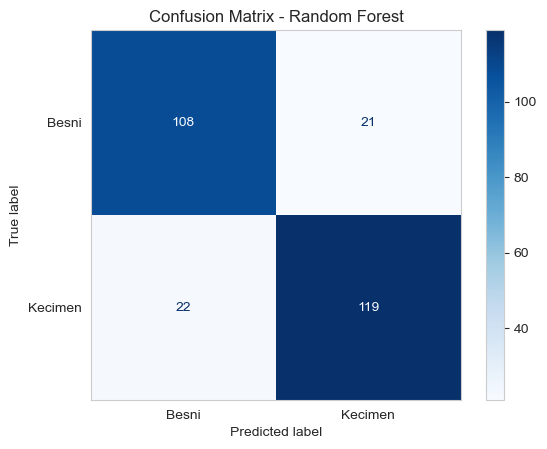

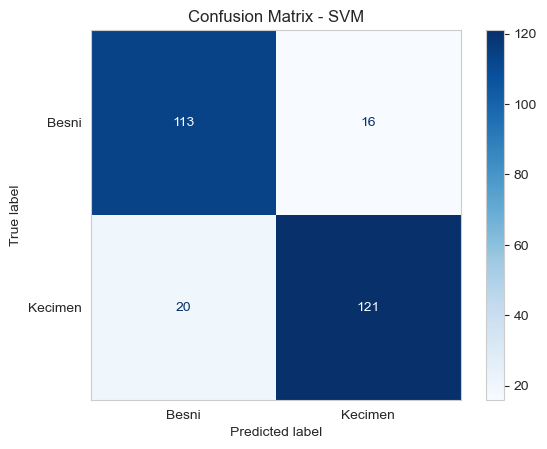

In [8]:
# Visualization can be further added based on specific interests, such as feature importance or decision boundaries.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_pred is the predictions from your model on the test set
y_pred_rf = grid_rf.best_estimator_.predict(X_test_scaled)

# Calculating the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix for Random Forest
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
#plt.show()
print("Best Parameters for Random Forest:", grid_rf.best_params_)  # Printing best hyperparameters found
print("Best Score for Random Forest:", grid_rf.best_score_)

# Repeat the process for the SVM model or any other model as needed
y_pred_svm = grid_svm.best_estimator_.predict(X_test_scaled)
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=grid_svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.grid(False)
#plt.show()
print("Best Parameters for SVM:", grid_svm.best_params_)  # Printing best hyperparameters found
print("Best Score for SVM:", grid_svm.best_score_)

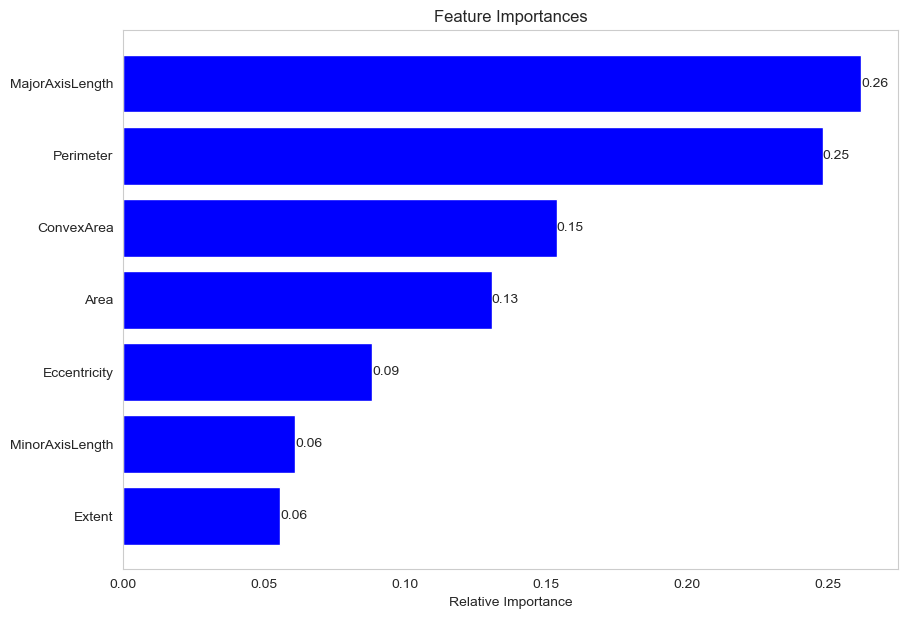

In [9]:

# Feature Importance from Random Forest
feature_importances = grid_rf.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)

plt.figure(figsize=(10, 7))
plt.title('Feature Importances')
bars = plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(False)
# Add label values to the bars
for bar, value in zip(bars, feature_importances[indices]):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', ha='left')

plt.show()

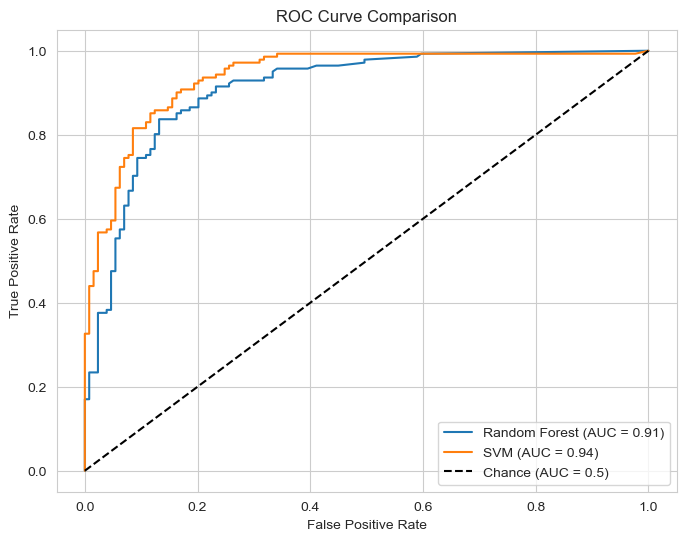

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode class values as integers
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Random Forest model probability predictions for the positive class
y_pred_rf_prob = grid_rf.best_estimator_.predict_proba(X_test_scaled)[:, 1]
# SVM model probability predictions for the positive class
y_pred_svm_prob = grid_svm.best_estimator_.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_encoded, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_encoded, y_pred_svm_prob)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plotting ROC Curves for both models
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance (AUC = 0.5)')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

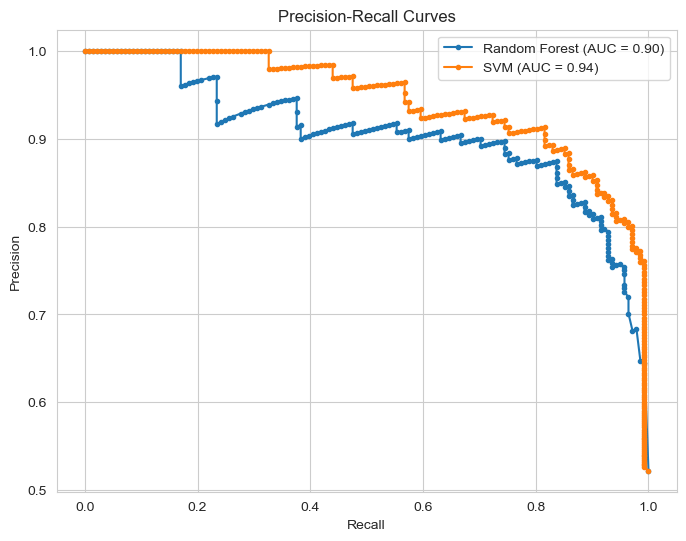

In [11]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve for Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test_encoded, y_pred_rf_prob)
# Calculate AUC for Random Forest
auc_rf = auc(recall_rf, precision_rf)

# Precision-Recall curve for SVM
# Note: If you're using decision_function for SVM, this part stays the same
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test_encoded, y_pred_svm_prob)
# Calculate AUC for SVM
auc_svm = auc(recall_svm, precision_svm)

# Plotting both Precision-Recall curves on the same plot with AUC in the legend
plt.figure(figsize=(8, 6))

# Random Forest with AUC in the legend
plt.plot(recall_rf, precision_rf, marker='.', label=f'Random Forest (AUC = {auc_rf:.2f})')

# SVM with AUC in the legend
plt.plot(recall_svm, precision_svm, marker='.', label=f'SVM (AUC = {auc_svm:.2f})')

# Plot labels and legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()

# Show plot
plt.show()


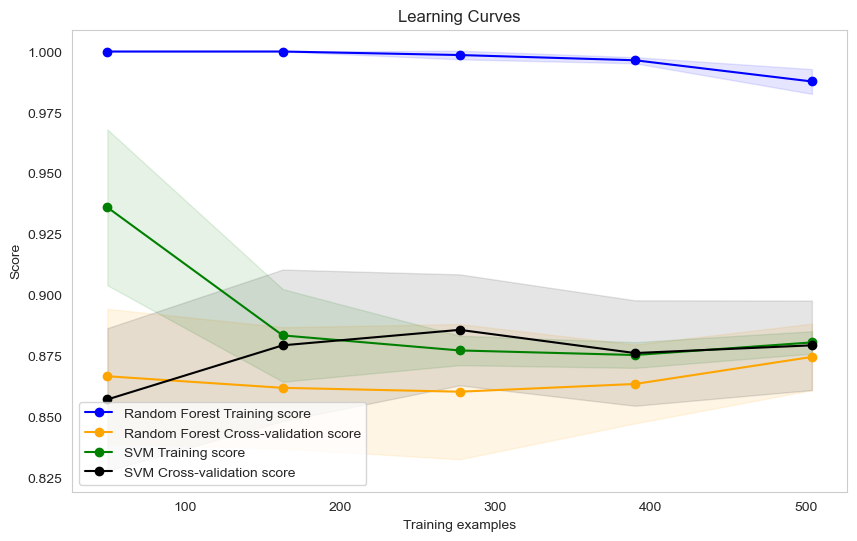

In [12]:
from sklearn.model_selection import learning_curve

def plot_combined_learning_curve(estimators, titles, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))

    colors = [('blue', 'orange'), ('green', 'black')]  # Define color pairs for training and cross-validation scores

    for estimator, title, (train_color, cv_color) in zip(estimators, titles, colors):
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Training score
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color=train_color)
        plt.plot(train_sizes, train_scores_mean, 'o-', color=train_color,
                 label=f"{title} Training score")

        # Cross-validation score
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color=cv_color)
        plt.plot(train_sizes, test_scores_mean, 'o-', color=cv_color,
                 label=f"{title} Cross-validation score")

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Assuming grid_rf.best_estimator_ and grid_svm.best_estimator_ are your trained models
estimators = [grid_rf.best_estimator_, grid_svm.best_estimator_]
titles = ['Random Forest', 'SVM']

# Plotting the combined learning curve with specified colors
plot_combined_learning_curve(estimators, titles, X_train_scaled, y_train_encoded, cv=5, n_jobs=4)